Vamos fazer aqui uma analise para verificar a pipeline dos paises que fizeram comentários

In [22]:
import sys
import os
sys.path.append('../../src')

from pipes.social_pipeline import create_geographic_pipeline 
from social_analysis import load_comments_from_json

# Lista de países para filtrar
paises = ["Brasil", "Estados Unidos", "Espanha", "França", "Alemanha"]

# Carrega os comentários do arquivo JSON
comments = load_comments_from_json("../../data/comments_dataset.json")

# Cria e executa o pipeline geográfico
pipeline = create_geographic_pipeline(countries=paises)
processed_comments = list(pipeline.process(comments))

# Imprime um resumo dos resultados
print("\n" + "="*60)
print("📊 ANÁLISE GEOGRÁFICA DOS COMENTÁRIOS")
print("="*60)

# Contagem de comentários por país
countries = {}
for comment in processed_comments:
    country = comment.get('country', 'Desconhecido')
    countries[country] = countries.get(country, 0) + 1

print("\nDistribuição de comentários por país:")
for country, count in sorted(countries.items(), key=lambda x: x[1], reverse=True):
    print(f"🌍 {country}: {count:,} comentários")

print("="*60)



📊 ANÁLISE GEOGRÁFICA DOS COMENTÁRIOS

Distribuição de comentários por país:
🌍 França: 808 comentários
🌍 Brasil: 804 comentários
🌍 Estados Unidos: 768 comentários
🌍 Alemanha: 745 comentários
🌍 Espanha: 734 comentários


Grafico da operação gerada

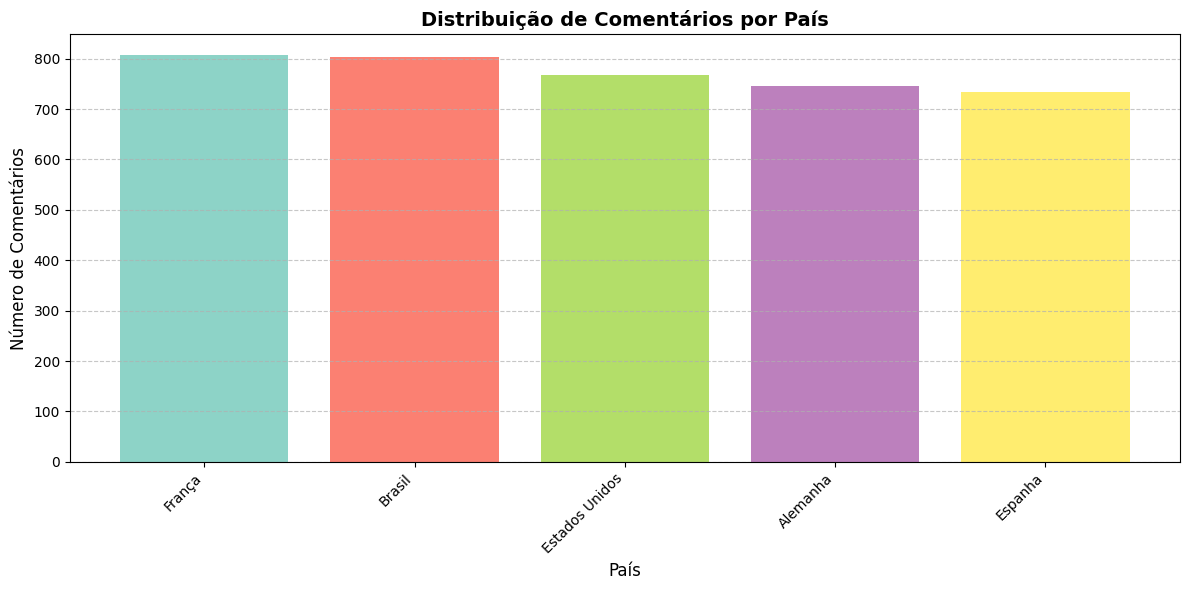

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Ordena os países por número de comentários
sorted_countries = dict(sorted(countries.items(), key=lambda x: x[1], reverse=True))

# Define cores diferentes para cada barra
cores = plt.cm.Set3(np.linspace(0, 1, len(sorted_countries)))

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(sorted_countries.keys(), sorted_countries.values(), color=cores)

# Personaliza o gráfico
plt.title('Distribuição de Comentários por País', fontsize=14, fontweight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Comentários', fontsize=12)

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()


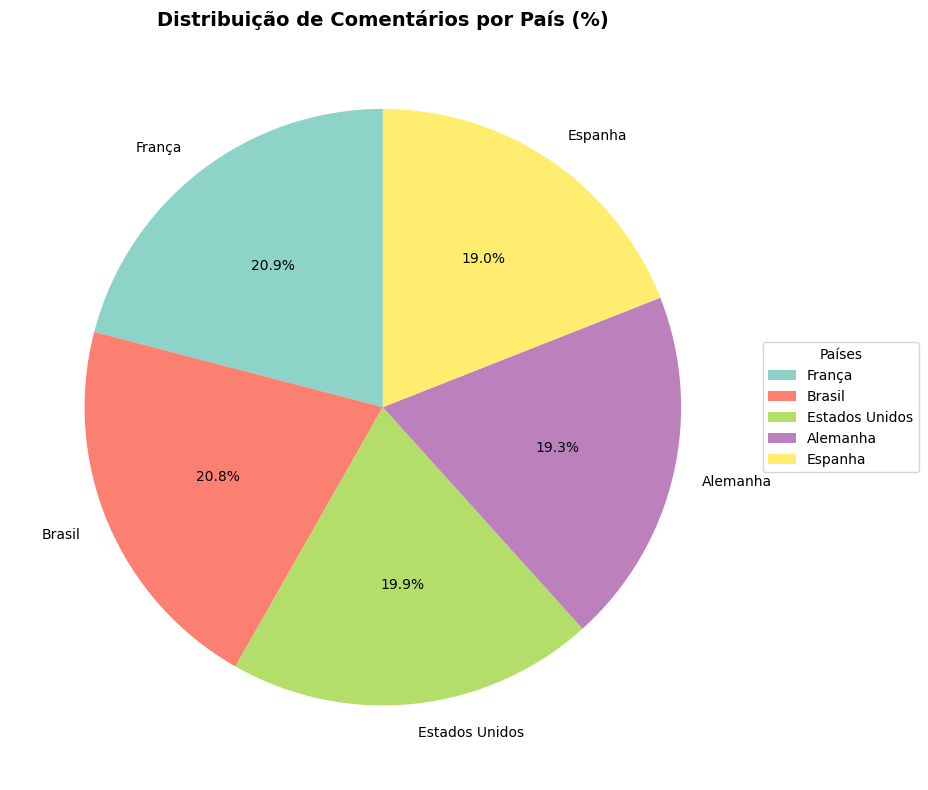

In [25]:
# Importa numpy
import numpy as np

# Cria o gráfico de pizza
plt.figure(figsize=(12, 8))
cores = plt.cm.Set3(np.linspace(0, 1, len(sorted_countries)))
plt.pie(sorted_countries.values(), labels=sorted_countries.keys(), autopct='%1.1f%%', 
        colors=cores, startangle=90)

# Personaliza o gráfico
plt.title('Distribuição de Comentários por País (%)', fontsize=14, fontweight='bold')

# Adiciona legenda
plt.legend(sorted_countries.keys(), title="Países", 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ajusta o layout para não cortar a legenda
plt.tight_layout()

# Mostra o gráfico
plt.show()
